In [1]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 63.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 71.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 111.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 43.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
data_train = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2013_gezi/train.csv')

In [13]:
data_train.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,0,10k yellow gold blue colored. blue cluster col...,0.040000,0.000000,Neutral
1,1,14k yellow/white gold 0.04 ct. diamond 7 004 d...,0.000000,0.000000,Neutral
2,2,stop 3qt red sand scoop{ special } free shovel...,0.457143,0.252381,Positive
3,3,"solid report claims iphone 5s available gold, ...",0.318182,0.178788,Positive
4,4,gold boss chain necklace fashion accessories shop,0.000000,0.000000,Neutral


In [14]:
data_test = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2013_gezi/test.csv')

In [15]:
data_test.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,17000,"gold marked 50.00inr lower sharps pixley 29,95...",0.600000,0.100000,Positive
1,17001,silver gold – new divergence? gold goldprice,0.454545,0.136364,Positive
2,17002,silver gold – new divergence? gold goldprice,0.454545,0.136364,Positive
3,17003,silver gold – new divergence? gold goldprice,0.454545,0.136364,Positive
4,17004,"gold fix rate usd: 1,375.25 gbp: 878.47 eur: 1...",0.000000,0.000000,Neutral


In [16]:
(X_train, y_train), (X_test, y_test), preprocess = text.texts_from_df(train_df = data_train,
                 text_column = 'tweet',
                 label_columns = 'Analysis',
                 val_df = data_test,
                 maxlen = 400,
                 ngram_range=2,
                 preprocess_mode = 'bert')

['Negative', 'Neutral', 'Positive']
   Negative  Neutral  Positive
0       0.0      1.0       0.0
1       0.0      1.0       0.0
2       0.0      0.0       1.0
3       0.0      0.0       1.0
4       0.0      1.0       0.0
['Negative', 'Neutral', 'Positive']
   Negative  Neutral  Positive
0       0.0      0.0       1.0
1       0.0      0.0       1.0
2       0.0      0.0       1.0
3       0.0      0.0       1.0
4       0.0      1.0       0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [17]:
X_train[0].shape

(17000, 400)

In [18]:
model = text.text_classifier(name='bert',
                            train_data = (X_train, y_train),
                            preproc = preprocess)

Is Multi-Label? False
maxlen is 400
done.


In [19]:
# Get learning rate.
learner = ktrain.get_learner(model = model,
                            train_data = (X_train, y_train),
                            val_data = (X_test, y_test),
                            batch_size = 6)

In [20]:
# get optimal learning rate.
#learner.lr_find(start_lr=1e-07, max_epochs=10)
#learner.lr_plot()

In [21]:
history = learner.fit_onecycle(lr = 2e-5, epochs = 3) #2e-5, 1e-4




begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
2834/2834 [==============================] - 1930s 674ms/step - loss: 0.2277 - accuracy: 0.9174 - val_loss: 1.2232 - val_accuracy: 0.7674
Epoch 2/3
2834/2834 [==============================] - 1906s 673ms/step - loss: 0.0304 - accuracy: 0.9920 - val_loss: 0.9783 - val_accuracy: 0.8108
Epoch 3/3
2834/2834 [==============================] - 1910s 674ms/step - loss: 0.0052 - accuracy: 0.9988 - val_loss: 1.1619 - val_accuracy: 0.8127


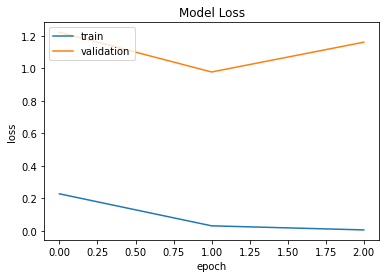

In [22]:
learner.plot('loss')

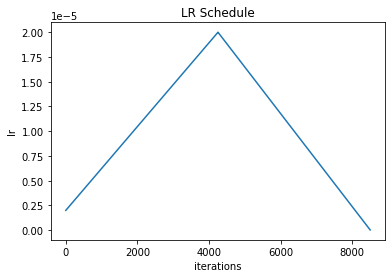

In [23]:
learner.plot('lr')

In [24]:
learner.validate()

165/165 [==============================] - 180s 1s/step
              precision    recall  f1-score   support

           0       0.82      0.30      0.44       918
           1       0.78      0.95      0.86      2953
           2       0.90      0.86      0.88      1383

    accuracy                           0.81      5254
   macro avg       0.83      0.70      0.73      5254
weighted avg       0.82      0.81      0.79      5254



array([[ 276,  594,   48],
       [  60, 2809,   84],
       [   0,  198, 1185]])